In [3]:
import gps_particle_dataMOD
import wget
import os
import numpy as np 
import time
import json
import sys
import math
from datetime import datetime, timedelta, date
from itertools import compress
from random import randint
import urllib2
import aacgmv2
import scipy
import matplotlib
from matplotlib import gridspec
import numpy as np
import matplotlib.pyplot as plt

In [4]:
#localpath = 'D:\\jackj\\Documents\\GitHub\\'
localpath = 'D:\\jackj\\Documents\\GitHub\\SP_2017\\Ltemp_41\\'
L_thres = np.arange(0.01,0.21,0.01)
#L_thres = np.append(L_thres, [0.50])
n=41

In [5]:
def get_conflvl(n, lthres):
    # setup the current file we are using
    slthres = ''.join(e for e in str(lthres) if e.isalnum())
    current_file = localpath + 'Ltemp_' + str(n) + '_' + slthres + '.ascii'
    
    print '=== %s' % (current_file)
    
    curdata = np.loadtxt(current_file)
    #convert the data into histogram bins.
    bins = np.arange(min(curdata), max(curdata)+1)
    hist, bin_edges = np.histogram(curdata,bins)
    
    print hist # number of items per bin
    #print bin_edges # interval of each bin.
    
    # n{sig} = (Nmax - Nbg/{sig})     taken from S. Yu Aleksandrin et al.: High-energy charged particle bursts
    
    Nmax = max(hist)
    Nbg = np.mean(hist)
    #Nbg = min(hist)
    sig = np.std(hist) #Should be from the background value...
    
    #nsig = (Nmax - Nbg/sig) # Confidence between 10~70 :: approx the plot we want.
    nsig = (Nmax - Nbg/sig)/sig # -- We want it in a number of standard deviations...
    #nsig = (max(hist) - min(hist[hist!=0]))/float(len(hist))
    #nsig = (Nmax - Nbg)/sig # Confidence between 2~2.5 :: wrong shape.
    
    ourstring = 'dL value: %s --- Conf Level: %s' % (lthres, nsig)
    print ourstring
    print 'Nmax, Nbg, sig, nsig'
    print Nmax, Nbg, sig, nsig
    #print min(hist[hist!=0])
    return nsig

=== D:\jackj\Documents\GitHub\SP_2017\Ltemp_41\Ltemp_41_001.ascii
[12 15  7 14  5  9  9 12 13  6 10 13 15 25 26  7 11  8 12 16 23 10 10  4]
dL value: 0.01 --- Conf Level: 4.20768679493
Nmax, Nbg, sig, nsig
26 12.1666666667 5.66911711723 4.20768679493
=== D:\jackj\Documents\GitHub\SP_2017\Ltemp_41\Ltemp_41_002.ascii
[19 28 16 22 10 19 21 26 20 12 24 27 27 46 49 11 16 15 27 33 36 28 17 11]
dL value: 0.02 --- Conf Level: 4.66543568008
Nmax, Nbg, sig, nsig
49 23.3333333333 10.0027773921 4.66543568008
=== D:\jackj\Documents\GitHub\SP_2017\Ltemp_41\Ltemp_41_003.ascii
[30 44 32 32 24 28 26 44 35 17 32 38 43 63 77 21 24 23 41 54 46 35 32 21]
dL value: 0.03 --- Conf Level: 5.38924982498
Nmax, Nbg, sig, nsig
77 35.9166666667 13.804940742 5.38924982498
=== D:\jackj\Documents\GitHub\SP_2017\Ltemp_41\Ltemp_41_004.ascii
[42 62 47 45 36 40 36 57 47 32 41 51 59 75 93 33 31 34 63 68 68 51 37 22]
dL value: 0.04 --- Conf Level: 5.51537655432
Nmax, Nbg, sig, nsig
93 48.75 16.3203604944 5.51537655432
=== D

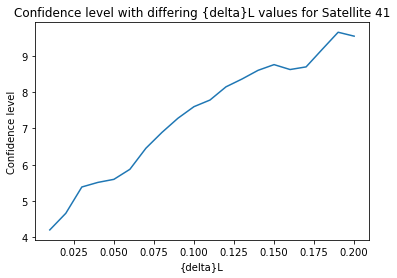

 
--- 0.416612411566 seconds ---


In [6]:
start_time = time.clock()
conflvl = []
for lthres in L_thres:
    conflvl.append(get_conflvl(n,lthres))
    
plt.plot(L_thres, conflvl)
plttitle = 'Confidence level with differing {delta}L values for Satellite %s' % (n)
plt.title(plttitle)
plt.xlabel('{delta}L')
plt.ylabel('Confidence level')

plt.show()

print " "
print "--- %s seconds ---" % (time.clock() - start_time) 

=== Ltemp_41_001.ascii
dL value: 0.01 --- Conf Level: 4.20768679493
Nmax, Nbg, sig, nsig
26 12.1666666667 5.66911711723 4.20768679493
=== Ltemp_41_002.ascii
dL value: 0.02 --- Conf Level: 4.66543568008
Nmax, Nbg, sig, nsig
49 23.3333333333 10.0027773921 4.66543568008
=== Ltemp_41_003.ascii
dL value: 0.03 --- Conf Level: 5.38924982498
Nmax, Nbg, sig, nsig
77 35.9166666667 13.804940742 5.38924982498
=== Ltemp_41_004.ascii
dL value: 0.04 --- Conf Level: 5.51537655432
Nmax, Nbg, sig, nsig
93 48.75 16.3203604944 5.51537655432
=== Ltemp_41_005.ascii
dL value: 0.05 --- Conf Level: 5.59955133732
Nmax, Nbg, sig, nsig
104 61.75 17.9588650347 5.59955133732
=== Ltemp_41_006.ascii
dL value: 0.06 --- Conf Level: 5.87628329058
Nmax, Nbg, sig, nsig
115 75.5 18.8900326451 5.87628329058
=== Ltemp_41_007.ascii
dL value: 0.07 --- Conf Level: 6.45615459838
Nmax, Nbg, sig, nsig
134 89.5 20.0644793935 6.45615459838
=== Ltemp_41_008.ascii
dL value: 0.08 --- Conf Level: 6.89096240485
Nmax, Nbg, sig, nsig
143 1

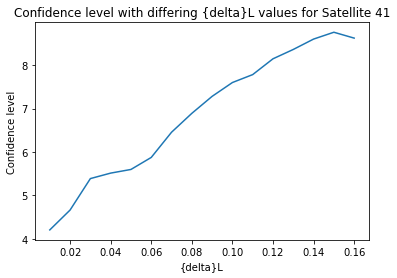

 
--- 0.340677261687 seconds ---


In [7]:
L_thres = np.arange(0.01,0.17,0.01)
#L_thres = np.append(L_thres, [0.50])
n=41
start_time = time.clock()
conflvl = []

for lthres in L_thres:
    # setup the current file we are using
    slthres = ''.join(e for e in str(lthres) if e.isalnum())
    current_file = 'Ltemp_' + str(n) + '_' + slthres + '.ascii'
    
    print '=== %s' % (current_file)
    
    curdata = np.loadtxt(current_file)
    #convert the data into histogram bins.
    bins = np.arange(min(curdata), max(curdata)+1)
    hist, bin_edges = np.histogram(curdata,bins)
    
    #print hist # number of items per bin
    #print bin_edges # interval of each bin.
    
    # n{sig} = (Nmax - Nbg/{sig})     taken from S. Yu Aleksandrin et al.: High-energy charged particle bursts
    
    Nmax = max(hist)
    Nbg = np.mean(hist)
    sig = np.std(hist) #Should be from the background value...
    
    #nsig = (Nmax - Nbg/sig) # Confidence between 10~70 :: approx the plot we want.
    nsig = (Nmax - Nbg/sig)/sig # -- We want it in a number of standard deviations...
    #nsig = (max(hist) - min(hist[hist!=0]))/float(len(hist))
    #nsig = (Nmax - Nbg)/sig # Confidence between 2~2.5 :: wrong shape.
    
    
    conflvl.append(nsig)
    
    ourstring = 'dL value: %s --- Conf Level: %s' % (lthres, nsig)
    print ourstring
    print 'Nmax, Nbg, sig, nsig'
    print Nmax, Nbg, sig, nsig
    #print min(hist[hist!=0])

plt.plot(L_thres, conflvl)
plttitle = 'Confidence level with differing {delta}L values for Satellite %s' % (n)
plt.title(plttitle)
plt.xlabel('{delta}L')
plt.ylabel('Confidence level')
plt.show()

print " "
print "--- %s seconds ---" % (time.clock() - start_time) 

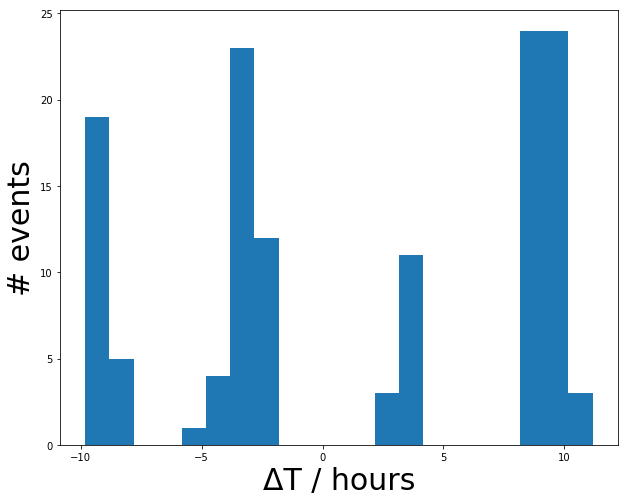

In [20]:
#plot the data so far
fig = plt.figure(figsize=(10, 8))
his = np.loadtxt('D:\\jackj\\Documents\\GitHub\\SP_2017\\Ltemp_56\\Ltemp_56_019.ascii')
plt.hist(his, bins = np.arange(min(his), max(his)+1))
plt.xlabel(u'ΔT / hours', fontsize  = 30)
plt.ylabel('# events', fontsize = 30)
plt.show()